# 第3週：對ptt與dcard上的鮭魚之亂議題進行情緒分析
**Author:** 黃天原<br>
**Date created:** 2021/09/30<br>
**Last modified:** 2021/09/30<br>
本週課程為「情緒分析1」，目的為了解lexicon-base 情緒分析。情緒分析步驟會因所要分析之語言不同而有所差異，在這個Jupyter Notebook當中將會展示「中文」的情緒分析，並且搭配python程式碼進行講解。在後面的內容中，我們將會介紹所使用到的套件、資料前處理、lexicon-base 情緒分析

## 大綱
+ 1. 套件說明
+ 2. 資料前處理
    + 2.1 基本資料介紹
    + 2.2 資料清理
    + 2.3 文章斷詞
+ 3. lexicon-base 情緒分析
    + 3.1 準備LIWC情緒字典
    + 3.2 情緒字典與斷詞結果進行合併
    + 3.3 正負向情緒分數聲量折線圖圖
    + 3.4 正負向情緒分數比例折線圖圖
    + 3.5 文字雲
    + 3.6 情緒代表字
    + 3.7 情緒關鍵字
    + 3.8 與Dcard文集比較

## 1. 套件說明
下面列出在本次實作過程中我們所使用到的相關套件，在這個Jupyter Notebook當中我們將會簡單的展示這些套件的使用方式，關於各個套件的進階使用請同學參照其官網的說明。
- pandas: 一個資料分析的函式庫，提供了DataFrame等資料格式，與資料處理的函數。
- NLTK: 全名為Natural Language Tool Kit，自然語言處理工具。
- re: 正規表達式套件。
- wordcloud: 文字雲繪圖工具。
- matplotlib: 繪圖工具。

In [1]:
# 安裝會使用到的套件
# %pip install wordcloud

In [2]:
# 確認當前工作目錄
%pwd

'/home/evan19983314/2022_summer_training'

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib
import re
from datetime import datetime
from wordcloud import WordCloud 
import jieba
import jieba.analyse

In [4]:
plt.rcParams['font.sans-serif']=['SimHei'] #使中文能正常顯示

## 2. 資料前處理
從網路或twitter api取得的原始資料可能包含雜訊（多餘的空白、html標籤、網址等），在進行斷詞處理前應先進行資料清理。

## 2.1 基本資料介紹
- 資料來源: 文字平台收集PTT Gossip版2021-03-10 ~ 2021-03-31 所有文章
- 資料集： `w3 hw1`
- 關鍵字：鮭、鮭魚、改名、壽司、壽司郎
- 資料時間：2021-03-09 ~ 2021-03-31 

主要分析ptt上網友的相關討論，並對比dcard上大家的討論情形。本次主要針對以下方向分析：
1. 鮭魚之亂的討論大概出現在哪個時間點，話題高峰在哪裡？
2. 正面和負面的討論內容各是甚麼，有沒有時間點上的差異？
3. 正面和負面討論的情緒分數大約多少？

## 3. lexicon-base 情緒分析
進行基於情緒字典的情緒分析，首先需要準備情緒字典後再將字典與斷詞後的文章進行合併

## 3.1 準備LIWC字典  
- 全名Linguistic Inquiry and Word Counts，由心理學家Pennebaker於2001出版  
- 分為正向情緒與負向情緒

,word,sentiments
0,一無所有,negative
1,七竅生煙,negative
2,上當,negative
3,下流,negative
4,下等,negative
...,...,...
1706,魅力,positive
1707,鮮明,positive
1708,鮮美,positive
1709,鼓勵,positive


,Unnamed: 0,artTitle,artDate,artTime,artUrl,artPoster,artCat,commentNum,push,boo,word
0,0,[問卦]怎麼介紹台北的特色美食?,2021-03-09,17:24:58,https://www.ptt.cc/bbs/Gossiping/M.1615310700....,Emerson158,Gossiping,18,8,3,雙北
1,0,[問卦]怎麼介紹台北的特色美食?,2021-03-09,17:24:58,https://www.ptt.cc/bbs/Gossiping/M.1615310700....,Emerson158,Gossiping,18,8,3,台北市
2,0,[問卦]怎麼介紹台北的特色美食?,2021-03-09,17:24:58,https://www.ptt.cc/bbs/Gossiping/M.1615310700....,Emerson158,Gossiping,18,8,3,北市
3,0,[問卦]怎麼介紹台北的特色美食?,2021-03-09,17:24:58,https://www.ptt.cc/bbs/Gossiping/M.1615310700....,Emerson158,Gossiping,18,8,3,btw
4,0,[問卦]怎麼介紹台北的特色美食?,2021-03-09,17:24:58,https://www.ptt.cc/bbs/Gossiping/M.1615310700....,Emerson158,Gossiping,18,8,3,台北縣


### 3.2 情緒字典與斷詞結果進行合併
將情緒字典與斷詞結果進行合併。。

,artDate,artUrl,word,sentiments
0,2021-03-09,https://www.ptt.cc/bbs/Gossiping/M.1615310700....,雙北,NaN
1,2021-03-09,https://www.ptt.cc/bbs/Gossiping/M.1615310700....,台北市,NaN
2,2021-03-09,https://www.ptt.cc/bbs/Gossiping/M.1615310700....,北市,NaN
3,2021-03-09,https://www.ptt.cc/bbs/Gossiping/M.1615310700....,btw,NaN
4,2021-03-09,https://www.ptt.cc/bbs/Gossiping/M.1615310700....,台北縣,NaN


### 3.3 正負向情緒分數聲量折線圖圖
分別畫出文集中，正向（positive）與負向（negative）情緒的折線圖

,artDate,sentiments,size
0,2021-03-09,negative,2
1,2021-03-10,negative,48
2,2021-03-10,positive,23
3,2021-03-11,positive,6
4,2021-03-12,negative,3


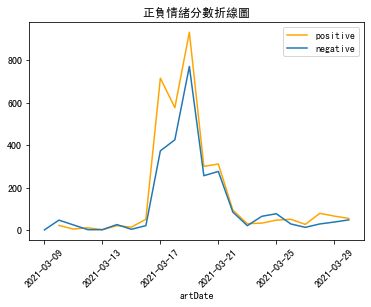

畫出每天的情緒總分數，可以看到大概在3/18後，短短的幾天內，情緒從正面為主轉為負面為主。約在20號之後討論度逐漸下降

### 3.4 正負向情緒分數比例折線圖圖

,artDate,sentiments,size,ratio
0,2021-03-09,negative,2,1.000000
1,2021-03-10,negative,48,0.676056
2,2021-03-10,positive,23,0.323944
3,2021-03-11,positive,6,1.000000
4,2021-03-12,negative,3,0.200000


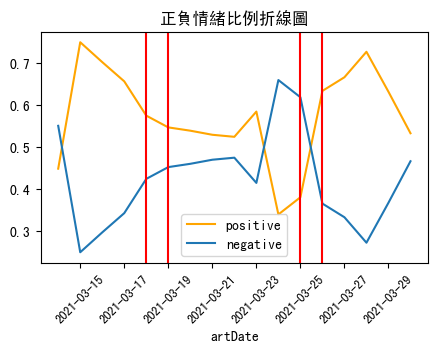

透過上圖我們可以發現3/18到3/19是一次情緒由正轉負的轉折，而3/25到3/26是一次情緒由負轉正的轉折

### 3.4 文字雲
針對不同日期畫出該天的文字雲，如果文字雲中的字詞大小越大，代表出現頻率越高

### 2021-03-17 文字雲
2021-03-17的文字雲，往前看17正面情緒較高的文字雲，發現此時負面批評詞彙較少，出現較多正面詞彙或中性詞彙，如「笑死」、「年輕人」、「行銷」、「活動」、「廣告」，推測此時負面文章較少，網友對鮭魚事件仍持一種較為幽默的態度，覺得此企劃好笑、年輕人太衝動等。

,artDate,word,size
21377,2021-03-19,鮭魚,788
7679,2021-03-17,鮭魚,730
17340,2021-03-19,改名,587
4990,2021-03-17,改名,569
13347,2021-03-18,鮭魚,557
10638,2021-03-18,改名,463
24969,2021-03-20,鮭魚,298
15449,2021-03-19,名字,284
3663,2021-03-17,名字,248
15323,2021-03-19,台灣,227


In [29]:
# wordcloud 的 input 是 dictionary


{'名字': 248,
 '壽司郎': 199,
 '免費': 186,
 '活動': 170,
 '壽司': 143,
 '台灣': 95,
 '八卦': 89,
 '今天': 71,
 'my': 66,
 '現在': 65,
 '看到': 64,
 '知道': 64,
 'from': 64,
 'on': 64,
 'Sent': 64,
 'JPTT': 62,
 '姓名': 59,
 '一堆': 58,
 '鮭魚之亂': 57,
 '優惠': 57,
 '戶政': 57,
 '民眾': 53,
 '同音': 51}

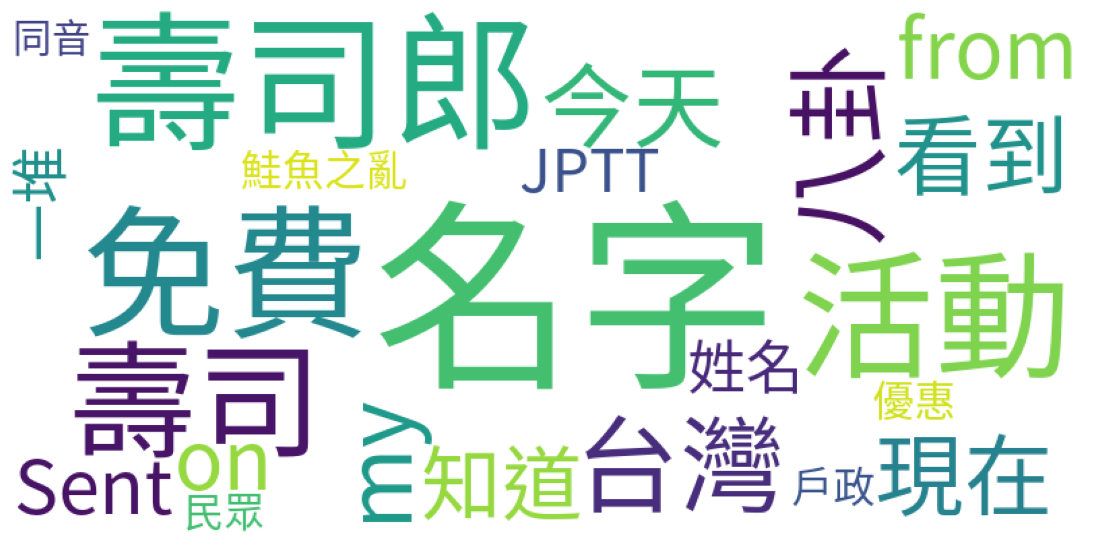

In [18]:
font = './SourceHanSansTW-Regular.otf' #中文字型路徑


### 2021-03-19 文字雲
先從2021-03-19的情緒高點看起，呼應上面負面的情緒分析，出現「浪費」、「貪小便宜」、「丟臉」、「乞丐」等詞彙。推測是因許多網友抨擊改名行為不明智，也批評部分免費吃壽司的人造成食物浪費。  
而「新聞」、「日本」、「韓國」等詞，則是討論台灣鮭魚改名之亂引起國際媒體關注


In [30]:
# 0319

{'名字': 284,
 '台灣': 227,
 '免費': 162,
 '壽司': 161,
 '活動': 161,
 '壽司郎': 127,
 '之夢': 116,
 '台灣人': 114,
 '現在': 106,
 '鮭魚之亂': 104,
 '知道': 100,
 '看到': 89,
 '報導': 85,
 '浪費': 82,
 '記者': 80,
 '日本': 80,
 '新聞': 78,
 '這種': 78,
 '表示': 65,
 '中國': 60,
 '戶政': 59,
 'my': 58,
 '最後': 57,
 '八卦': 57,
 '一次': 56,
 '網友': 55,
 '一堆': 54,
 'Sent': 54,
 '機會': 54,
 'on': 52}

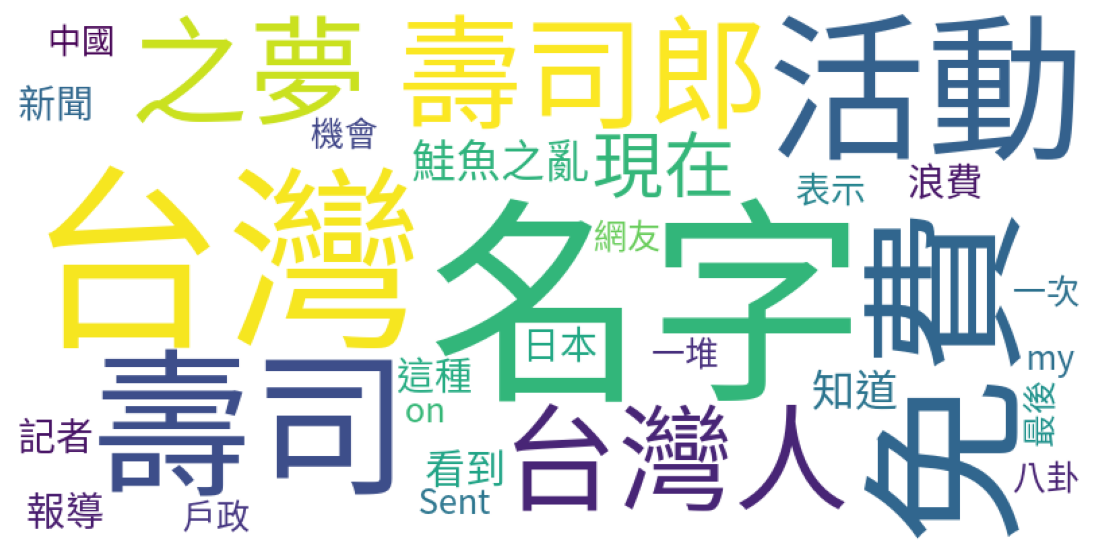

### 3.5 情緒代表字
從整個文集中計算出正負向情緒字的出現詞頻，並找出情緒的代表字

,word,sentiments,size
17,免費,positive,628
19,八卦,negative,290
15,優惠,positive,167
39,問題,negative,161
95,朋友,positive,152


,word,sentiments,size
103,決定,positive,32
54,好笑,positive,35
43,嘻嘻,positive,35
147,重要,positive,35
126,簡單,positive,38


,word,sentiments,size
45,嚴格,negative,15
49,垃圾,negative,15
41,嘲笑,negative,22
108,無聊,negative,24
46,嚴重,negative,28


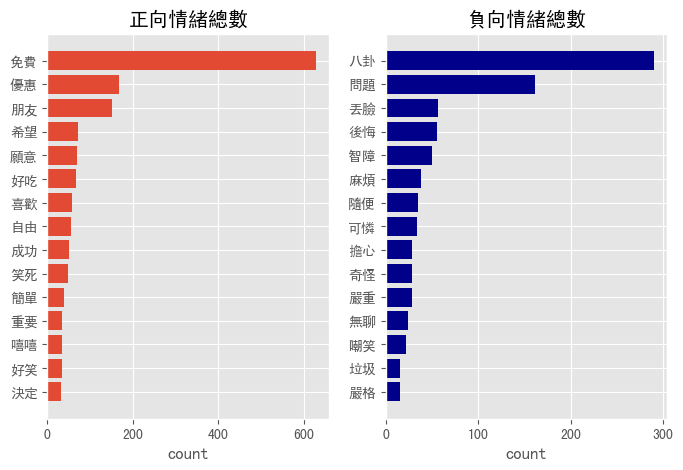

另外，也可以依據不同日期觀察情緒代表字的變化
### 2021-03-17 正負情緒代表字

In [22]:
#篩選日期


,artDate,word,sentiments,size
18,2021-03-17,免費,positive,186
19,2021-03-17,八卦,negative,89
17,2021-03-17,優惠,positive,57
50,2021-03-17,朋友,positive,36
58,2021-03-17,笑死,positive,20


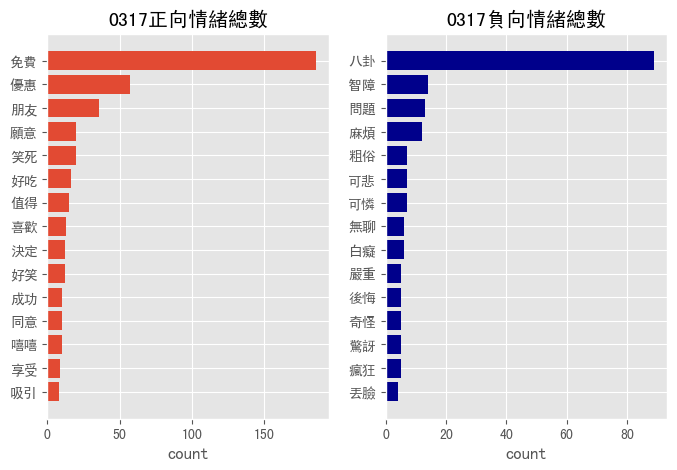